### Алгоритм градиентного бустинга

In [1]:
# возьмем готовую реализацию дерева решений для регрессии из библиотеки sklearn

from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
# Загрузим один из "тестовых" датасетов из той же библиотеки

from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [3]:
# Разделим выборку на обучающую и тестовую в соотношении 75/25

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
# Напишем функцию, реализующую предсказание в градиентном бустинге

def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
# В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
# Используем L2 loss L(y,z)=(y−z)2, ее производная по z примет вид L′(y,z)=2(z−y). 
#Реализуем ее также в виде функции (коэффициент 2 можно отбросить)

def bias(y, z):
    return (y - z)

In [7]:
# Реализуем функцию обучения градиентного бустинга

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
# Теперь обучим несколько моделей с разными параметрами и исследуем их поведение

# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1208.4414532301687
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5332.290741241187


In [11]:
# Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций

import matplotlib.pyplot as plt

In [12]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

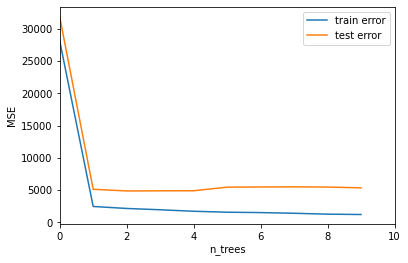

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

#### Такой результат не является удовлетворительным. Увеличим число деревьев

In [14]:
n_trees = 100
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1.6454619324696798
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7639.176381712991


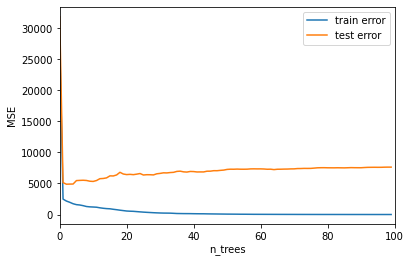

In [16]:
get_error_plot(n_trees, train_errors, test_errors)

#### Теперь попробуем уменьшить шаг

In [17]:
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 864.915722005058
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4174.169763922676


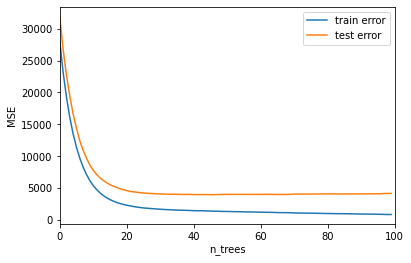

In [19]:
get_error_plot(n_trees, train_errors, test_errors)

#### Видим, что качество обучения улучшается. Уменьшим шаг до 0.01

In [20]:
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [21]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 5742.791378307148
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 8201.054807532508


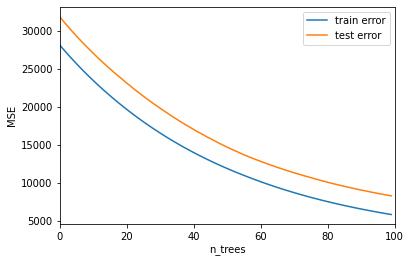

In [22]:
get_error_plot(n_trees, train_errors, test_errors)

#### При таком размере шага алгоритм сходится, но ему для достижения удовлетворительных показателей требуется большее количество итераций. Вернемся к шагу 0.1 и попробуем увеличить глубину деревьев

In [23]:
eta = 0.1
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [24]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 65.90314851479268
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4830.493599677599


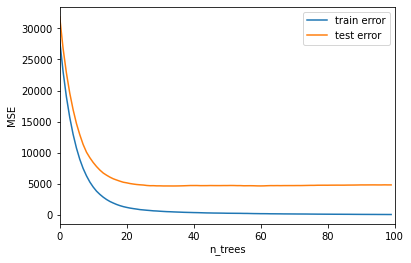

In [25]:
get_error_plot(n_trees, train_errors, test_errors)

### Задание 1:Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

#### 1. Предлагаю решить данную задачу следующим образом: 1) для зафиксированного числа деревьев (10, 20, 40, 60, 80, 100) построить модель GBM с разной глубиной дерева (3, 5,7, 9, 11, 13). 2) Полученные ошибки алгоритма зафиксируем и построим затем график. 3) Сделаем выводы.

In [26]:
# создадим список с количеством числа деревьев для обучения
n = [10,20,40,60,80,100]

# создадим список со значениями глубин деревьев

s = [3,5,7,9,11,13]

# В результате мы получим 36 пар значений MSE на тренировочной и тестовой выборках. 
# Предлагаю их хранить в структуре список списков

MAE_list = []

In [27]:
# Для лучшей работы необходимо скорректировать ранее написанную функцию evaluate_alg

def evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    
    e = []
    
    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
    e.append(mean_squared_error(y_train, train_prediction))
    e.append(mean_squared_error(y_test, test_prediction))
    
    MAE_list.append(e)

In [28]:
# Построим деревья с разной глубиной. Выведем результаты на печать для понимания того, что процесс не завис

for i in n:
    for t in s:
        
        n_trees = i
        coefs = [1] * n_trees
        max_depth = t
        eta = 1

        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        
        evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1208.4414532301687
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5332.290741241187
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 102.2891816696991
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тестовой выборке: 7672.798405562592
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 1.3012393351067624
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 1 на тестовой выборке: 7960.696007440617
Ошибка алгоритма из 10 деревьев глубиной 9     с шагом 1 на тренировочной выборке: 6.932861511244797e-05
Ошибка алгоритма из 10 деревьев глубиной 9     с шагом 1 на тестовой выборке: 7339.115965908083
Ошибка алгоритма из 10 деревьев глубиной 11     с шагом 1 на тренировочной выборке: 0.0
Ошибка алгоритма из 10 деревьев глубиной 11     с шагом 1 на тестовой выборке: 8031.9417065618845
Ошибка алгоритма из 

In [29]:
train_n_1 = []
test_n_1 = []
train_n_2 = []
test_n_2 = []
train_n_3 = []
test_n_3 = []
train_n_4 = []
test_n_4 = []
train_n_5 = []
test_n_5 = []
train_n_6 = []
test_n_6 = []

In [30]:
for i in MAE_list[0:6]:
    train_n_1.append(int(i[0]))
    test_n_1.append(int(i[1]))
for i in MAE_list[6:12]:
    train_n_2.append(int(i[0]))
    test_n_2.append(int(i[1]))
for i in MAE_list[12:18]:
    train_n_3.append(int(i[0]))
    test_n_3.append(int(i[1]))
for i in MAE_list[18:24]:
    train_n_4.append(int(i[0]))
    test_n_4.append(int(i[1]))
for i in MAE_list[24:30]:
    train_n_5.append(int(i[0]))
    test_n_5.append(int(i[1]))
for i in MAE_list[30:36]:
    train_n_6.append(int(i[0]))
    test_n_6.append(int(i[1]))

In [31]:
# Создание новой функции для построения графиков ошибки от количества деревьев

def get_error_plot(max_depth, train_err, test_err, u):
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.xlim(2, max_depth[-1]+1)
    plt.plot(max_depth, train_err, label='train error')
    plt.plot(max_depth, test_err, label='test error')
    plt.legend(loc='upper left')
    plt.title(str(u)+' tress')
    plt.show()

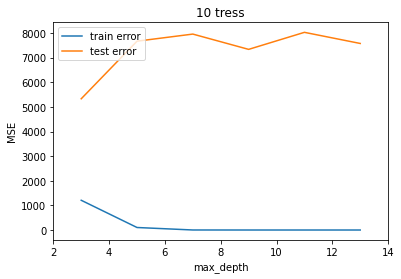

In [32]:
get_error_plot(s, train_n_1, test_n_1, 10)

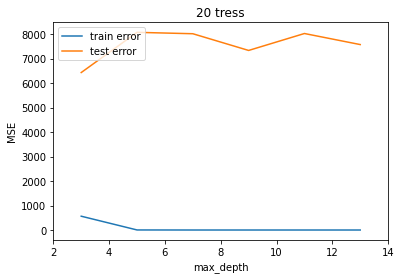

In [33]:
get_error_plot(s, train_n_2, test_n_2, 20)

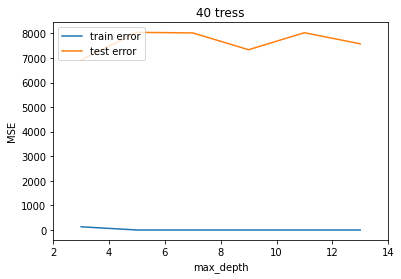

In [34]:
get_error_plot(s, train_n_3, test_n_3, 40)

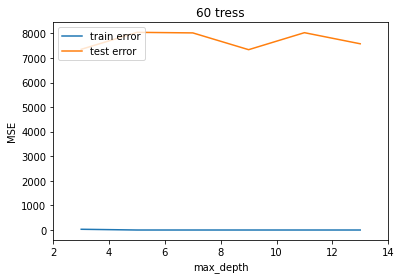

In [35]:
get_error_plot(s, train_n_4, test_n_4, 60)

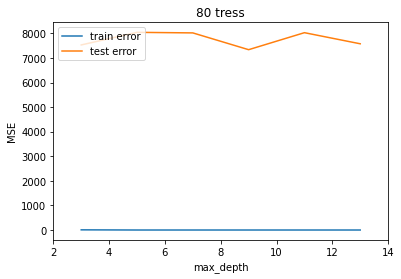

In [36]:
get_error_plot(s, train_n_5, test_n_5, 80)

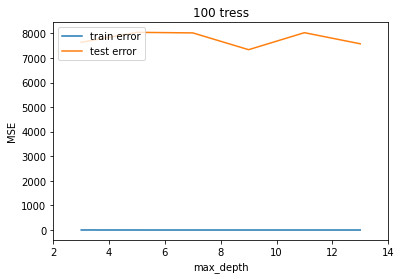

In [37]:
get_error_plot(s, train_n_6, test_n_6, 100)

#### Вывод: 1. С увеличением числа деревьев разница между ошбиками на тренировочной и тестовой выборках увеличивается. 2. С увеличением глубины деревьев переобучение наступает гораздо быстрее.

In [38]:
# Теперь уменьшим скорость обучения

for i in n:
    for t in s:
        
        n_trees = i
        coefs = [1] * n_trees
        max_depth = t
        eta = 0.1

        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        
        evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5420.946213109961
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 7835.565156891253
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4492.111351348154
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 8437.936308531469
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 3926.530012450904
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 8624.234170722175
Ошибка алгоритма из 10 деревьев глубиной 9     с шагом 0.1 на тренировочной выборке: 3553.4913814810493
Ошибка алгоритма из 10 деревьев глубиной 9     с шагом 0.1 на тестовой выборке: 8981.523156732885
Ошибка алгоритма из 10 деревьев глубиной 11     с шагом 0.1 на тренировочной выборке: 3453.391542734738
Ошибка алгоритма из 10 деревьев глубиной 11     с шагом 0.1 на тестовой выборке: 9181.53481

In [39]:
train_n_7 = []
test_n_7 = []
train_n_8 = []
test_n_8 = []
train_n_9 = []
test_n_9 = []
train_n_10 = []
test_n_10 = []
train_n_11 = []
test_n_11 = []
train_n_12 = []
test_n_12 = []

In [40]:
for i in MAE_list[0:6]:
    train_n_7.append(int(i[0]))
    test_n_7.append(int(i[1]))
for i in MAE_list[6:12]:
    train_n_8.append(int(i[0]))
    test_n_8.append(int(i[1]))
for i in MAE_list[12:18]:
    train_n_9.append(int(i[0]))
    test_n_9.append(int(i[1]))
for i in MAE_list[18:24]:
    train_n_10.append(int(i[0]))
    test_n_10.append(int(i[1]))
for i in MAE_list[24:30]:
    train_n_11.append(int(i[0]))
    test_n_11.append(int(i[1]))
for i in MAE_list[30:36]:
    train_n_12.append(int(i[0]))
    test_n_12.append(int(i[1]))

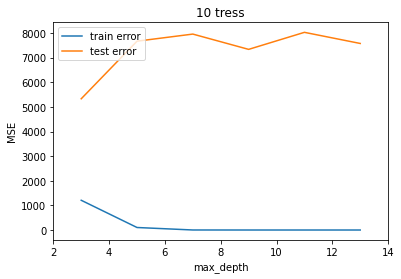

In [48]:
get_error_plot(s, train_n_7, test_n_7, 10)

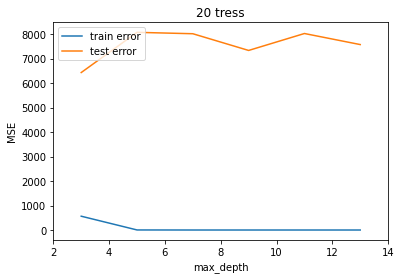

In [42]:
get_error_plot(s, train_n_8, test_n_8, 20)

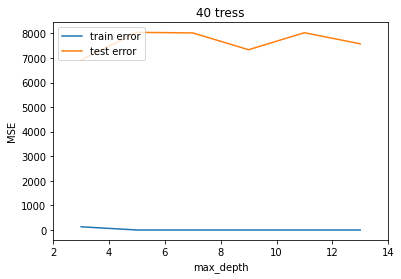

In [43]:
get_error_plot(s, train_n_9, test_n_9, 40)

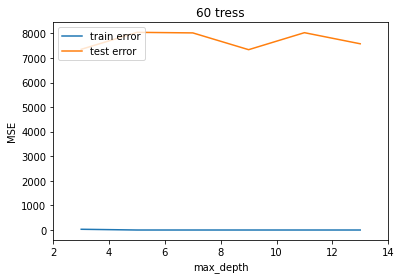

In [44]:
get_error_plot(s, train_n_10, test_n_10, 60)

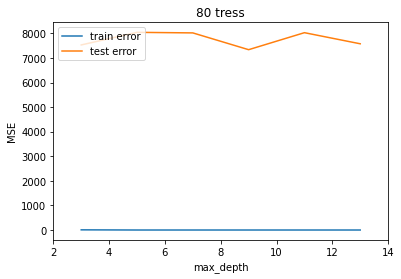

In [45]:
get_error_plot(s, train_n_11, test_n_11, 80)

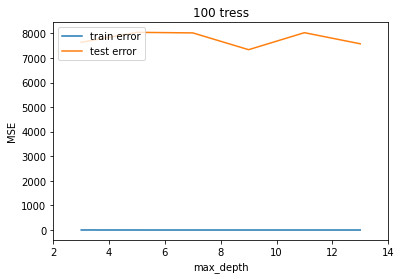

In [46]:
get_error_plot(s, train_n_12, test_n_12, 100)

#### Вывод: 1. С уменьшением шага обучения на одинаковом числе деревьев разница между ошбиками на тренировочной и тестовой выборках не так велика и увеличивается постепенно, по сравнению с шагом = 1. 2. С увеличением глубины деревьев переобучение наступает гораздо быстрее и в целом характер графиков MSE аналогичен с предыдущими. Таким образом,уменьшать шаг обучения целесообразно только при небольших значениях параметров количества и глубины деревьев.